*ASSIGNMENT 2*

**BMDP RATHNAYAKE**

**D/ENG/21/0046/ET**

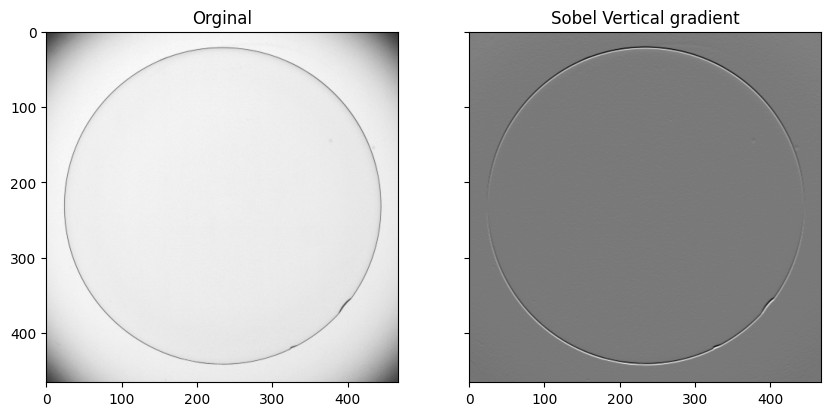

In [7]:
#QUESTION 1

#Sobel Vertical
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel Vertical gradient')
plt.show()

**1.b**

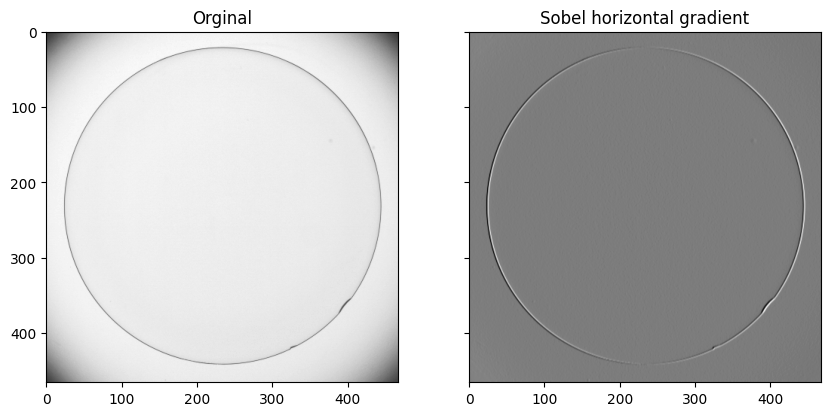

In [8]:
#Sobel horizontal
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel horizontal gradient')
plt.show()

**1.c**

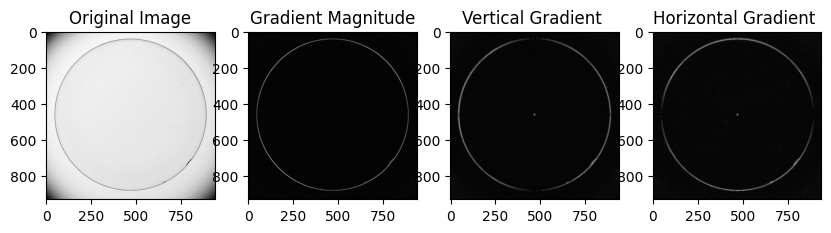

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded the image into a numpy array called "image"
# Compute the gradient in the x and y direction
image = cv.imread('images/contactlens.tif',cv.IMREAD_GRAYSCALE)
fx = np.gradient(image)[0]
fy = np.gradient(image)[1]

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# vertical gradient fx using the Sobel kernel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)

# horizontal gradient fy using the Sobel kernel
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)


# Compute the gradient magnitude
gradient_mag = np.abs(fx) + np.abs(fy)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

# Display the original image in the first subplot
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

# Display the gradient magnitude in the second subplot
axs[1].imshow(gradient_mag, cmap='gray')
axs[1].set_title('Gradient Magnitude')

axs[2].imshow(np.absolute(sobelx).astype('uint8'), cmap='gray')
axs[2].set_title("Vertical Gradient ")
axs[3].imshow(np.absolute(sobely).astype('uint8'), cmap='gray')
axs[3].set_title("Horizontal Gradient ")

# Show the figure
plt.show()




**1.d**

Center: (468, 463)
Diameter: 846 pixels


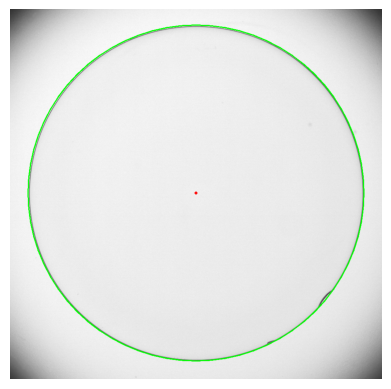

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('images/contactlens.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# vertical gradient fx using the Sobel kernel
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

# horizontal gradient fy using the Sobel kernel
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# Compute the gradient magnitude |fx|+|fy|
mag = cv2.addWeighted(np.absolute(sobelx), 1, np.absolute(sobely), 1, 0)

# The threshold
ret, thresh = cv2.threshold(mag.astype('uint8'), 73, 255, cv2.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Finding the circle
if len(contours) > 0:
    c = max(contours, key=cv2.contourArea)
    
    #Least square method
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    
    #draw circle
    cv2.circle(img, center, radius, (0, 255, 0), 2)
    cv2.circle(img, center, 2, (0, 0, 255), 3)
    
    #center and diameter
    print("Center: ({}, {})".format(center[0], center[1]))
    print("Diameter: {} pixels".format(radius * 2))
    
#Result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**02.a**

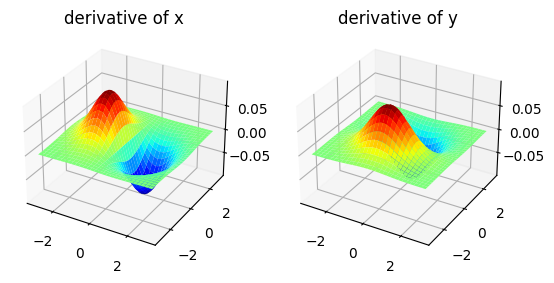

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#defining the variable regions
x, y = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))
z = np.zeros_like(x)

sigma = 1
#3D gaussian kernel
K = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(x**2 + y**2 + z**2) / (2.0 * sigma**2))

#derivatives of 3D gaussian kernel
dK_dx = (-x / sigma**2) * K
dK_dy = (-y / sigma**2) * K

# plot the kernels
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title("derivative of x")
ax1.plot_surface(x, y, dK_dx, cmap='jet')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title("derivative of y")
ax2.plot_surface(x, y, dK_dy, cmap='jet')

plt.show()


**QUESTION 03**

**a**

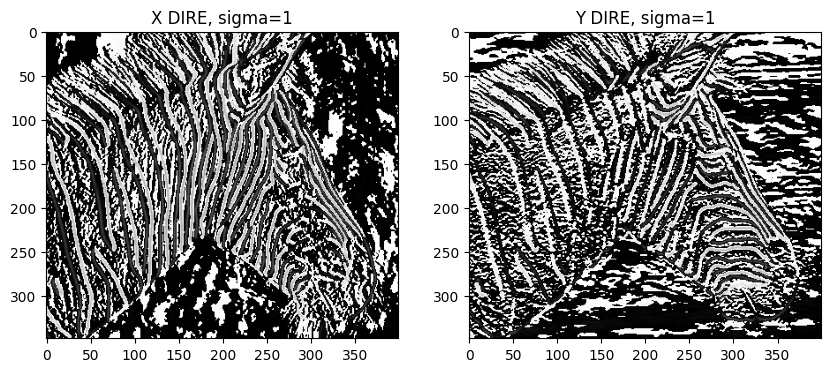

In [15]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the grayscale version of the zebrahead.jpg image
image = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

# Define the Gaussian kernels for sigma = 1 and sigma = 3
sigma1 = 1
size1 = 2 * np.ceil(3 * sigma1) + 1
x, y = np.meshgrid(np.arange(-size1 / 2, size1 / 2 + 1), np.arange(-size1 / 2, size1 / 2 + 1))
ker1 = (-x / sigma1**2) * np.exp(-(x**2 + y**2) / (2 * sigma1**2))
ker1 /= np.sum(np.abs(ker1))

imgx = ndimage.convolve(image, ker1, mode='nearest')
imgy = ndimage.convolve(image, ker1.T, mode='nearest')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imgx, cmap='gray')
axs[0].set_title('X DIRE, sigma=1')
axs[1].imshow(imgy, cmap='gray')
axs[1].set_title('Y DIRE, sigma=1')
plt.show()

**B**

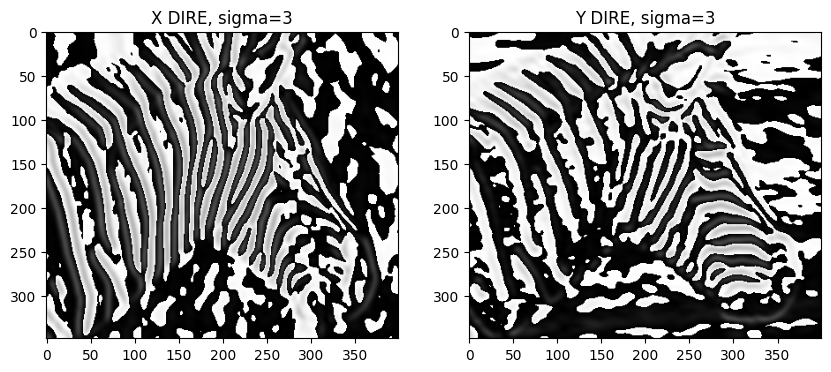

In [16]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the grayscale version of the zebrahead.jpg image
image = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

# Define the Gaussian kernels for sigma = 1 and sigma = 3
sigma1 = 3
size1 = 2 * np.ceil(3 * sigma1) + 1
x, y = np.meshgrid(np.arange(-size1 / 2, size1 / 2 + 1), np.arange(-size1 / 2, size1 / 2 + 1))
ker1 = (-x / sigma1**2) * np.exp(-(x**2 + y**2) / (2 * sigma1**2))
ker1 /= np.sum(np.abs(ker1))

imgx = ndimage.convolve(image, ker1, mode='nearest')
imgy = ndimage.convolve(image, ker1.T, mode='nearest')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imgx, cmap='gray')
axs[0].set_title('X DIRE, sigma=3')
axs[1].imshow(imgy, cmap='gray')
axs[1].set_title('Y DIRE, sigma=3')
plt.show()

**QUESTION 04** 

**a**

**b**

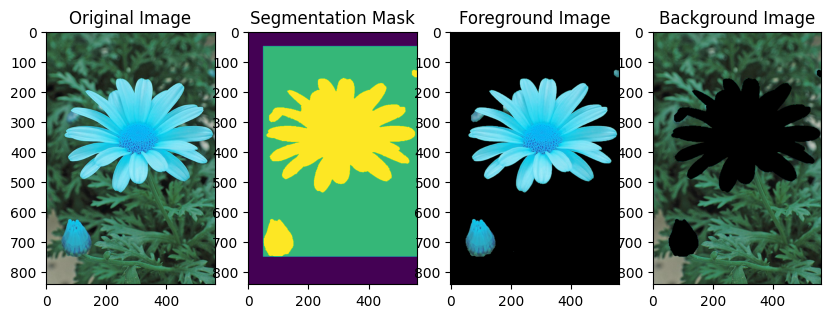

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/daisy.jpg')

# Create a mask with same dimensions as image, and set everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

# Define the rectangle enclosing the flower
rect = (50, 50, 700, 700)

# Run the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)

# Create a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

# Apply the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Show the final segmentation mask, foreground image, and background image


fig, axs = plt.subplots(1, 4, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
axs[2].imshow(foreground)
axs[2].set_title('Foreground Image')

axs[3].imshow(background)
axs[3].set_title('Background Image')




plt.show()


Text(0.5, 1.0, 'enhanced image')

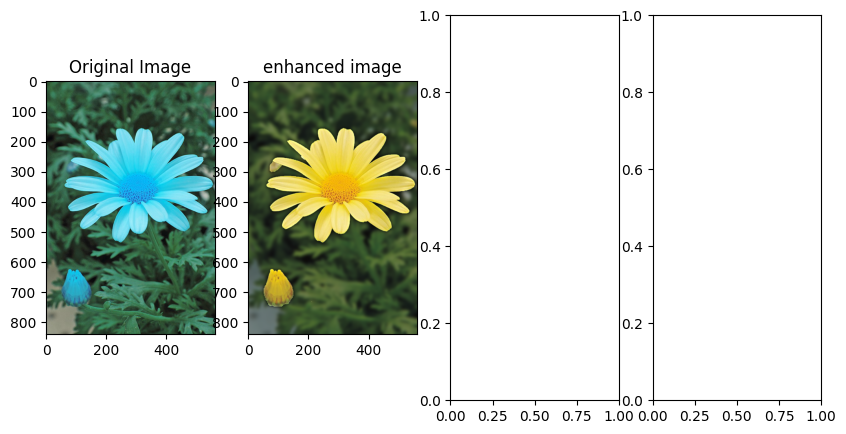

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/daisy.jpg')

# Create a mask with same dimensions as image, and set everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

# Define the rectangle enclosing the flower
rect = (50, 50, 700, 700)

# Run the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)

# Create a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

# Apply the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)
# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)

# Combine the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Show the final segmentation mask, foreground image, and background image


fig, axs = plt.subplots(1, 4, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(enhanced_img[:,:,::-1])
axs[1].set_title('enhanced image')